# 데이터 전처리(Data Preprocessing)
---

- **데이터 전처리 방법**
    - Scaling
        - Min-Max Scaling
        - Standard Scaling
    - Sampling
    - Dimensionality Reduction (차원의 축소)
    - Categorical Variable to Numeric Variable
- **활용할 데이터** : `abalone.txt` (전복 데이터)

- 필요한 패키지를 설치한다.

In [46]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install imblearn

> 아래의 내용들은 앞으로 데이터를 불러올 때마다 습관적으로 하는 것이 좋다.

In [47]:

import numpy as np
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt

import os
from os.path import join
import warnings
warnings.filterwarnings('ignore')    # 가벼운 경고창은 무시하기

먼저 머신러닝의 대표적인 데이터 셋 중 하나인 전복 데이터를 불러오겠습니다. 전복 데이터셋은 수컷, 암컷, 유아기 3개의 범주로 이루어진 범주형 변수와 길이, 직경, 높이, 무게 등 여러 수치형 변수로 이루어져 있습니다. 데이터를 불러온 후 입력으로 사용할 변수들과 레이블로 사용할 성별 변수로 나누겠습니다.

In [48]:
abalone_path = join('./files', 'abalone.txt')
column_path = join('./files', 'abalone_attributes.txt')

abalone_columns = list()   # 리스트 객체 생성
for l in open(column_path):
    abalone_columns.append(l.strip())    # '\n' 제거, strip() : 공백 문자, 개행 문자 모두 제거, 외부에서 받은 데이터, 사용자가 입력한 데이터 등을 사용할 때마다 습관적으로 strip() 함수를 사용하는 것이 좋다.

print(abalone_columns)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


In [49]:
# Pandas를 이용해서 abalone 데이터를 읽어온다.
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)   # 헤더가 없는 데이터이기 때문에 header=None 옵션을 넣어주고, 헤더를 abalone_columns로 설정한다.
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


- `head()`, `shape`를 사용해서 데이터를 살펴본다.

In [50]:
# head(), shape를 사용해서 데이터를 살펴본다.
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [51]:
data.shape

(4177, 9)

- Label인 성별(`Sex`) 컬럼을 삭제한다.

In [52]:
label = data['Sex']
del data['Sex']     # 성별 데이터(Label) 삭제
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [53]:
data.describe()    # 전체 범위값 확인

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [54]:
data.info()    # 각각의 자료형을 확인한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


# Scaling
---

## ① Min-Max Scaling
---
- 특정 변수의 최대, 최소값으로 조절하는 방식이다.
- 데이터의 값이 널뛰기를 한다면 Min-Max Scaling을 해줘야 한다.
- Min-Max Scaling은 모든 값들을 `0`에서 `1` 사이의 값으로 바꾼다.

In [55]:
data2 = (data - np.min(data)) / (np.max(data) - np.min(data))
data2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.015690,0.012586,0.003276,0.017724,0.007741,0.003483,0.005172,0.517241
1,0.012069,0.009138,0.003103,0.007776,0.003431,0.001672,0.002414,0.241379
2,0.018276,0.014483,0.004655,0.023345,0.008845,0.004879,0.007241,0.310345
3,0.015172,0.012586,0.004310,0.017793,0.007431,0.003931,0.005345,0.344828
4,0.011379,0.008793,0.002759,0.007069,0.003086,0.001362,0.001897,0.241379
...,...,...,...,...,...,...,...,...
4172,0.019483,0.015517,0.005690,0.030586,0.012759,0.008241,0.008586,0.379310
4173,0.020345,0.015172,0.004655,0.033310,0.015138,0.007397,0.008983,0.344828
4174,0.020690,0.016379,0.007069,0.040552,0.018121,0.009914,0.010621,0.310345
4175,0.021552,0.016724,0.005172,0.037741,0.018310,0.009000,0.010207,0.344828


### (1) 데이터 전처리 모듈 불러오기 및 사용하기
---

In [56]:
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()
mMscaler.fit(data)
data3 = mMscaler.transform(data)    # 변환 작업 (numpy 배열로 나온다.)
data3    # 넘파이 배열 형태이기 때문에 head()를 쓸 수 없다. (head()는 판다스 객체에서 쓸 수 있다.)

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

- 위의 과정을 다음과 같이 한꺼번에 수행할 수 있다.

In [57]:
mMscaler = MinMaxScaler()
data4 = mMscaler.fit_transform(data)    # fitting과 transform을 한꺼번에 해준다.
type(data4)

numpy.ndarray

- 넘파이 배열을 판다스 형태로 변환한다.

In [58]:
mMscaled_data = pd.DataFrame(data4, columns=data.columns)
mMscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


## ② Standard Scaling
---

- **z-score** 라고 하는 데이터를 통계적으로 표준 정규 분포화 시켜 스케일링을 하는 방식이다.
- 데이터의 평균이 `0`, 표준 편차가 `1`이 되도록 스케일링한다.
- `-1`에서 `0` 사이의 값으로 변환한다.

In [59]:
from sklearn.preprocessing import StandardScaler

sdscaler = StandardScaler()
sdscaled_data = sdscaler.fit_transform(data)

sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns)
sdscaled_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


# Sampling
---

- 클래스 불균형 문제란, 분류를 목적으로 하는 데이터셋에 클래스 라벨의 비율이 균형을 맞추지 않고, 한쪽으로 치우친 경우를 말한다.
- 이런 경우, 모델이 각 클래스와 데이터를 제대로 학습하기 어려워진다.
- 따라서 각 클래스별 균형을 맞추는 작업이 필요한데, 이것이 샘플링(Sampling)이다.

## ① Random Over/Under Sampling
---

In [60]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [61]:
# Over Sampling
oversampled_data, oversampled_label = ros.fit_resample(data, label) 
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

# Under Sampling
undersampled_data, undersampled_label = rus.fit_resample(data, label)
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)

In [62]:
print('원본 데이터의 클래스 비율 \n{0}'.format(pd.get_dummies(label).sum()))
print('\nRandom Over 샘플링 결과 \n{0}'.format(pd.get_dummies(oversampled_label).sum()))
print('\nRandom Under 샘플링 결과 \n{0}'.format(pd.get_dummies(undersampled_label).sum()))

원본 데이터의 클래스 비율 
F    1307
I    1342
M    1528
dtype: int64

Random Over 샘플링 결과 
F    1528
I    1528
M    1528
dtype: int64

Random Under 샘플링 결과 
F    1307
I    1307
M    1307
dtype: int64


### SMOTE(Synthetic Minority Over-sampling TEchnique)
---

- 대표적인 오버 샘플링 기법 중 하나이다.
- 낮은 비율로 존재하는 클래스의 데이터를 최근접 이웃(k-NN) 알고리즘을 활용하여 새롭게 생성하는 방법이다.
- 오버 샘플링 기법 중 단순 무작위 추출을 통해 데이터의 수를 늘리는 방법도 존재하는데, 데이터를 단순하게 복사하기 때문에 과적합 문제가 발생하기도 한다.
- 하지만, SMOTE는 알고리즘을 기반으로 데이터를 생성하므로, 과적합 발생 가능성이 단순 무작위 방법보다 적다.
- [참고 사이트](http://www.incodom.kr/SMOTE)

In [63]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)

In [64]:
from sklearn.datasets import make_classification

data, label = make_classification(n_samples=1000,            # 총 샘플의 개수 (다폴트 : 100)
                                  n_features=2,              # 독립 변수의 수 (디폴트 : 20)
                                  n_informative=2,           # 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수 (디폴트 : 2)
                                  n_redundant=0,     # 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수 (디폴트 : 2)
                                  n_repeated=0,     # 독립 변수 중 단순 중복된 성분의 수 (디폴트 : 0)
                                  n_classes=3,      # 종속 변수의 클래스 수 (디폴트 : 2)
                                  n_clusters_per_class=1,      # 클래스 당 클러스터의 수 (디폴트 : 2)
                                  weights=[0.05, 0.15, 0.8],   # 각 클래스에 할당된 표본 수
                                  class_sep=0.8,  
                                  random_state=2019)     # 난수 발생 시드

In [65]:
print(label)

[1 1 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 0 1 2 2
 1 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 0 0 2 1 2 1 2 1 2 2 2 1 2 2 2 2
 1 2 2 0 2 1 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 0 2 1 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 1 2 2 2 1 1 2 2 2 2 2 2 0 0 0 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 1 2 2 2 2 2 2 0 2 2 2 0 2 2 2 1 2 2 0 2 2 2 2 2 0 2 2 0 2 1 2 2 2 1
 2 0 2 2 2 2 0 2 2 2 1 2 1 2 2 2 1 1 2 2 2 2 2 2 2 1 0 2 1 2 2 2 2 1 1 2 2
 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 0
 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 1 2 2 1 0 2 2 2 2 2 2 

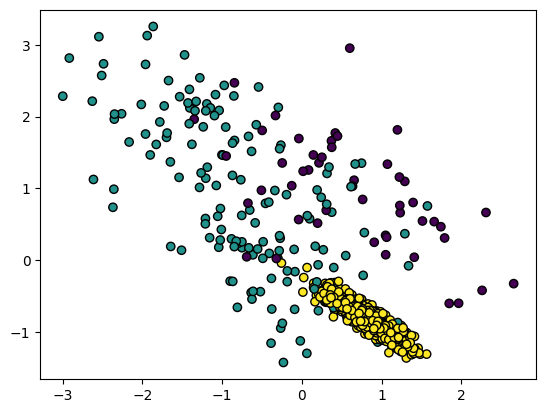

In [66]:
fig = plt.Figure(figsize=(12, 6))
plt.scatter(data[:, 0], data[:, 1], c=label, linewidth=1, edgecolor='black')

- 이제 SMOTE를 사용해보자.

In [67]:
smoted_data, smoted_label = smote.fit_resample(data, label)

In [68]:
print('원본 데이터의 클래스 비율\n{0}'.format(pd.get_dummies(label).sum()))
print('Smoted 데이터의 클래스 비율\n{0}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율
0     53
1    154
2    793
dtype: int64
Smoted 데이터의 클래스 비율
0    793
1    793
2    793
dtype: int64


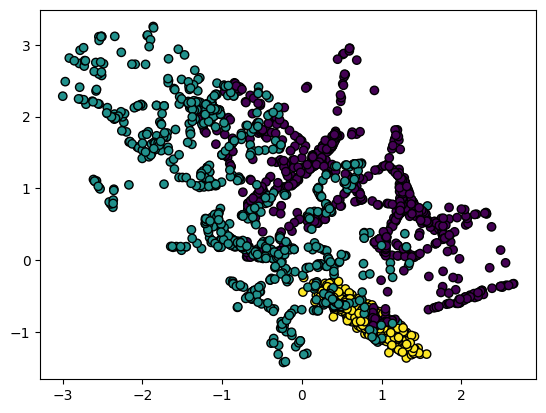

In [69]:
fig = plt.Figure(figsize=(12, 6))
plt.scatter(smoted_data[:, 0], smoted_data[:, 1], c=smoted_label, linewidth=1, edgecolor='black')

- 편향되지 않도록 하기 위해 빈자리의 값들이 채워진 것들을 볼 수 있다.

# 차원의 축소(Dimensionality Reduction)
---

- 데이터의 밀도를 높여서 학습의 효율을 높이기 위해 차원을 축소한다.
- 사람이 인식할 수 있는 차원은 3차원이 최대이므로, 데이터 시각화를 위해 차원을 축소하기도 한다.
- **주성분 분석(Principal Component Analysis, PCA) 기법** 을 사용하여 차원 축소를 진행한다.

In [70]:
# 차원의 축소
from sklearn.datasets import load_digits

digits = load_digits()

In [71]:
print(digits.DESCR)   # 설명 확인

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [72]:
data = digits.data 
label = digits.target

# data[0].reshape((8, 8))    # 64차원의 배열을 8x8 크기로 바꾼다.

In [73]:
print(data[0])
print(label[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


- 데이터의 형태를 `reshape()` 를 사용해서 바꿀 수 있다.

In [74]:
print(data[0].reshape((8, -1)))  # reshape(8,8)을 좀 더 쉽게 표현 (8개씩 끊고, 나머지 개수는 알아서 정리해라.)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Label: 0


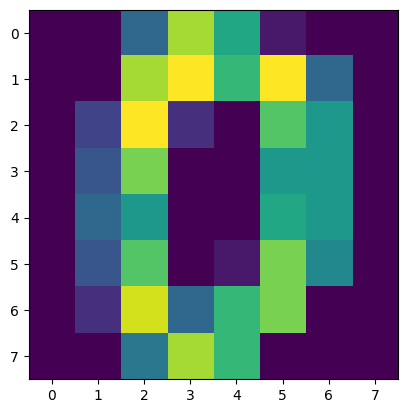

In [75]:
plt.imshow(data[0].reshape((8, 8)))
print('Label: {}'.format(label[0]))

- 차원을 2차원으로 축소해본다. 필요한 패키지를 불러온다.

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)    # 2차원으로 축소한다.

In [77]:
# 데이터에서 주 성분을 찾기 
new_data = pca.fit_transform(data)

In [78]:
# 결과 살펴보기 
print('원본 데이터의 차원 \n{}'.format(data.shape))
print('PCA 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA 데이터의 차원 
(1797, 2)


- 차원을 2차원으로 줄였는데도 데이터들이 집합을 유지하고 있다.

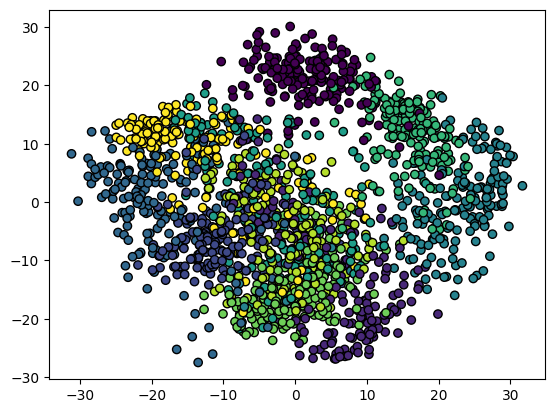

In [79]:
plt.scatter(new_data[:, 0], new_data[:, 1], c=label, linewidth=1, edgecolor='black')

# Categorical Variable to Numeric Variable
---

## ① Label Encoding
---

- `n`개의 **범주형 데이터**를 `0` ~ `n-1`의 연속적인 **수치 데이터**로 표현한다.
- 예를 들어, 차의 등급 변수를 `0`(소형), `1`(중형), `2`(대형)으로 라벨 인코딩하여 변환할 수 있다.
    - 라벨 인코딩은 간단한 방법이지만, `소형`, `중형`이라는 범주형 데이터가 가지고 있는 차이가 `0`과 `1`의 수치적인 차이라는 의미가 아님을 주의해야 한다.

In [80]:
# Label Encoding
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
label = data['Sex']
del data

In [81]:
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder()

encoded_label = labelEncode.fit_transform(label)
encoded_label

array([2, 2, 0, ..., 2, 0, 2])

## ② One-hot Encoding
---

- `n`개의 **범주형 데이터**를 `n`개의 **비트(`0`, `1`) 벡터**로 표현한다.
- 예를 들어, 위에서 언급한 `소형`, `중형`, `대형`으로 이루어진 **범주형 데이터**를 원핫 인코딩으로 변환하면 다음과 같이 표현할 수 있다.
    - 소형 : `[1, 0, 0]`
    - 중형 : `[0, 1, 0]`
    - 대형 : `[0, 0, 1]`
- 원핫 인코딩으로 범주형 데이터를 나타내게 되면, 서로 다른 범주에 대해서는 백터 내적을 취했을 때 내적 값이 `0`이 나오게 된다.
    - 서로 다른 범주 데이터는 독립적인 관계라는 것을 표현할 수 있게 된다.

In [82]:
# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [83]:
# label.values.reshape((-1, 1))     # 한 줄에 1개씩 넣어서 만든다. 
one_hot_encoded = ohe.fit_transform(label.values.reshape((-1, 1)))

In [84]:
one_hot_encoded

<4177x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4177 stored elements in Compressed Sparse Row format>

In [85]:
columns = np.concatenate([np.array(['label']), ohe.categories_[0]])
columns

array(['label', 'F', 'I', 'M'], dtype=object)

In [86]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(label.values.reshape((-1, 1)))
one_hot_encoded = ohe.transform(label.values.reshape((-1, 1)))

columns = np.concatenate([np.array(['label']) , ohe.categories_[0]])
print(columns)
result = pd.DataFrame(data = np.concatenate(
                      [label.values.reshape((-1, 1)), one_hot_encoded.reshape((-1, 3))], 
                      axis=1),columns=columns)
result.head(10)

['label' 'F' 'I' 'M']


,label,F,I,M
0,M,0.0,0.0,1.0
1,M,0.0,0.0,1.0
2,F,1.0,0.0,0.0
3,M,0.0,0.0,1.0
4,I,0.0,1.0,0.0
5,I,0.0,1.0,0.0
6,F,1.0,0.0,0.0
7,F,1.0,0.0,0.0
8,M,0.0,0.0,1.0
9,F,1.0,0.0,0.0
